# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load data
url = '/content/Pemegang Izin Bekerja Bagi Tenaga Asing yang Bebas Usaha Menurut Kebangsaannya di Provinsi Jawa Tengah, 2014-2024.csv'
df = pd.read_csv(url, delimiter=';')

# 3. Ringkasan data
print(df.head())
print(df.info())

   Tahun  Tionghoa RRC  Tionghoa bukan RRT  India  Belanda  \
0   2014          5506                 346   2208      573   
1   2016          5977                 316   1861      436   
2   2017          6324                 334   2019      421   
3   2018          9315                 363   2384      500   
4   2019         11935                 421   2951      499   

   Bangsa Asia lainnya  Bangsa Eropa Lainnya  Amerika/Kanada  \
0                 1365                  1565             553   
1                 1025                   206             677   
2                 1074                   203             621   
3                 1577                   275             676   
4                 1814                   261             828   

   Australia / Selandia Baru  Hongkong  ...  Jepang  Jerman  Korea Selatan  \
0                        991        24  ...    2212     516           2026   
1                        163        33  ...    2113     651           2046   
2       

# Exploratory Data Analyst (EDA)

# Jumlah Pemegang Izin Bekerja Tenaga Asing per Tahun

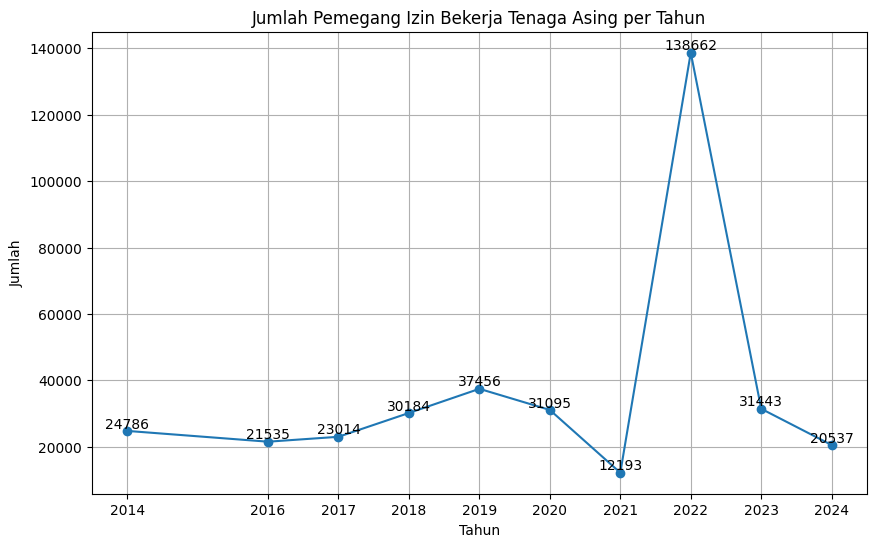

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Tahun'], df['Jumlah'], marker='o')
for i, jumlah in enumerate(df['Jumlah']):
    plt.text(df['Tahun'][i], jumlah, str(jumlah), ha='center', va='bottom')
plt.title('Jumlah Pemegang Izin Bekerja Tenaga Asing per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(True)
plt.xticks(df['Tahun'])
plt.show()

# 5 Kebangsaan Terbanyak Pemegang Izin Bekerja per Tahun

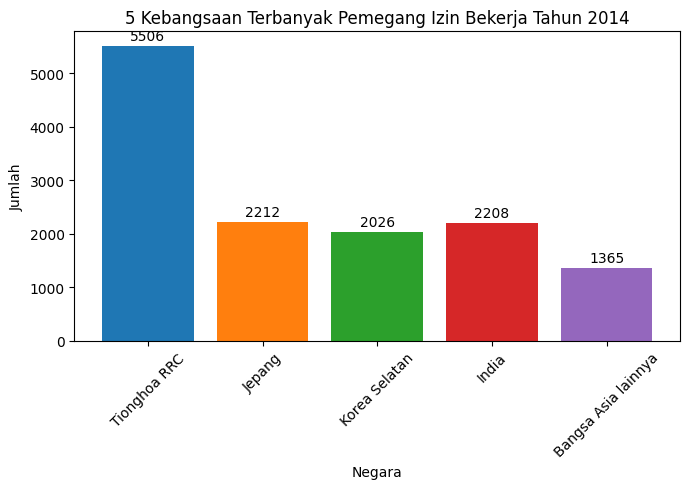

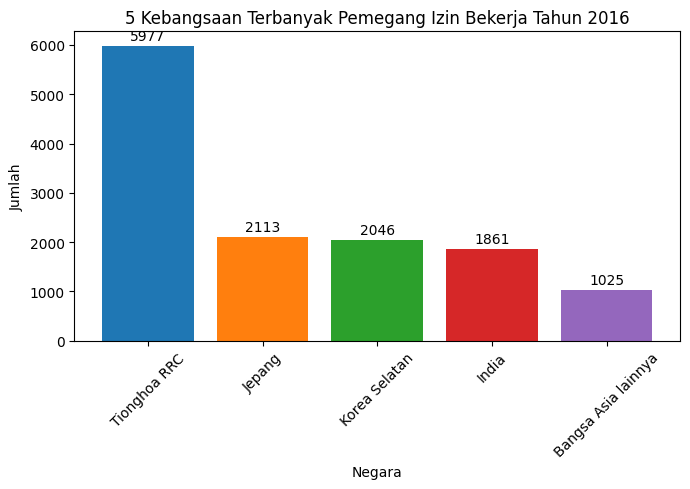

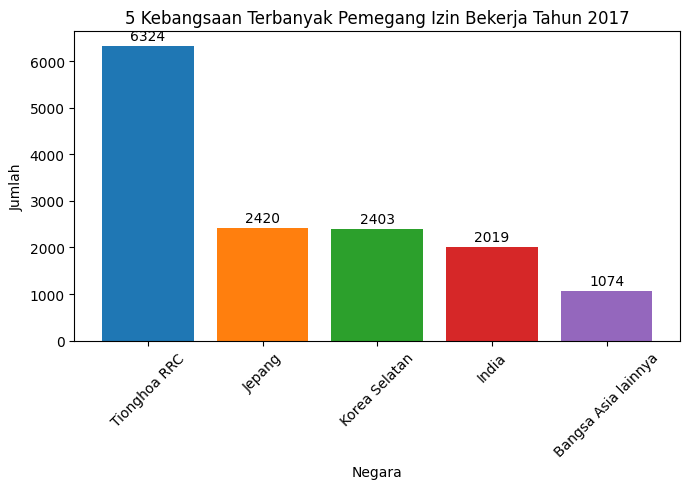

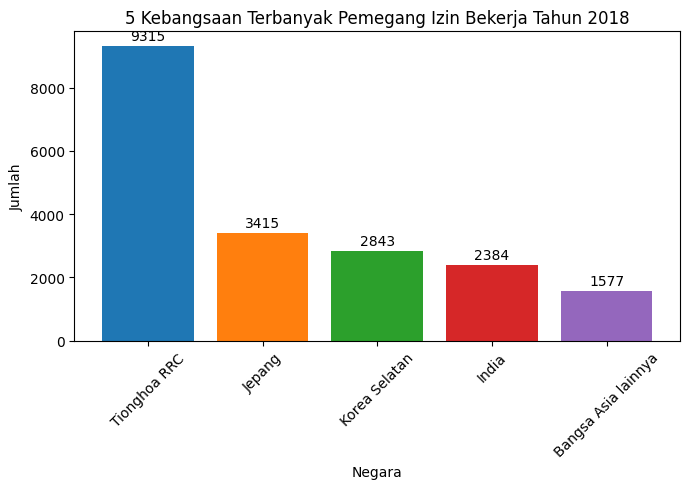

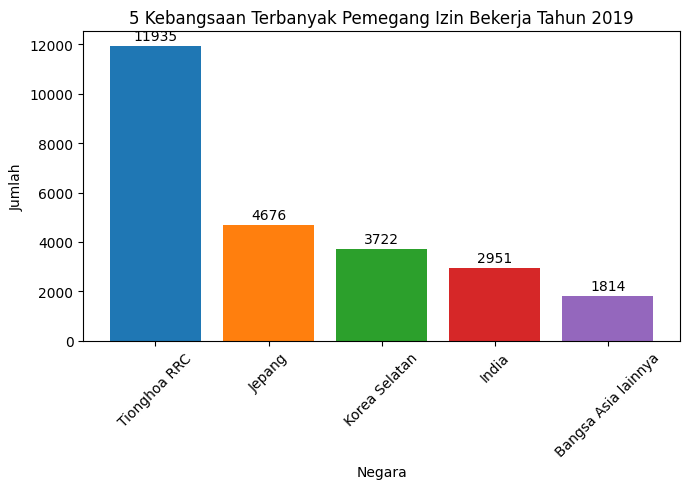

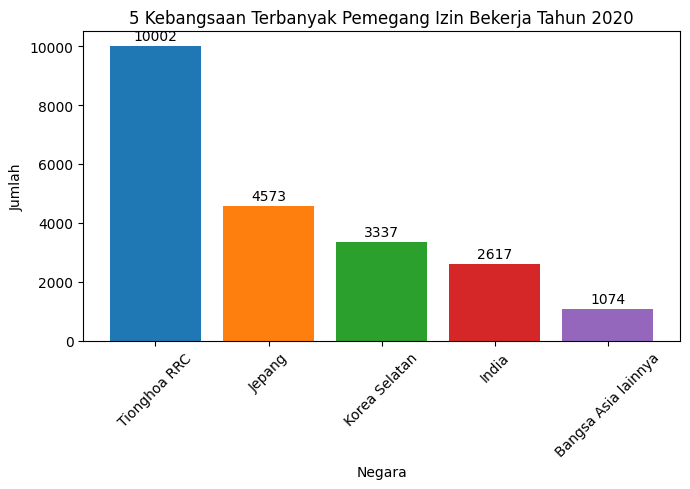

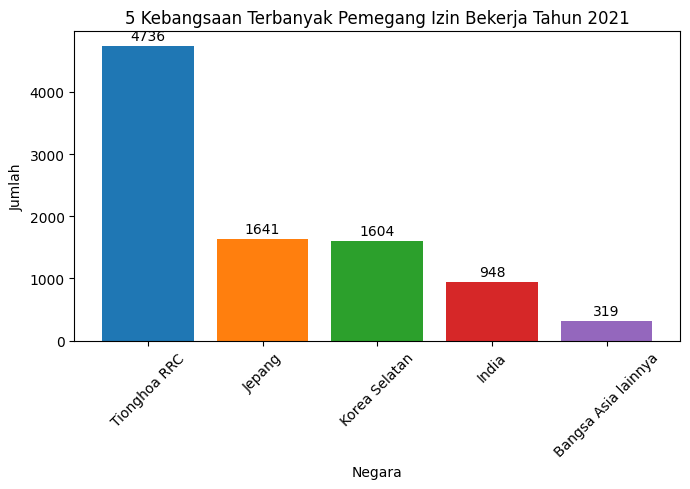

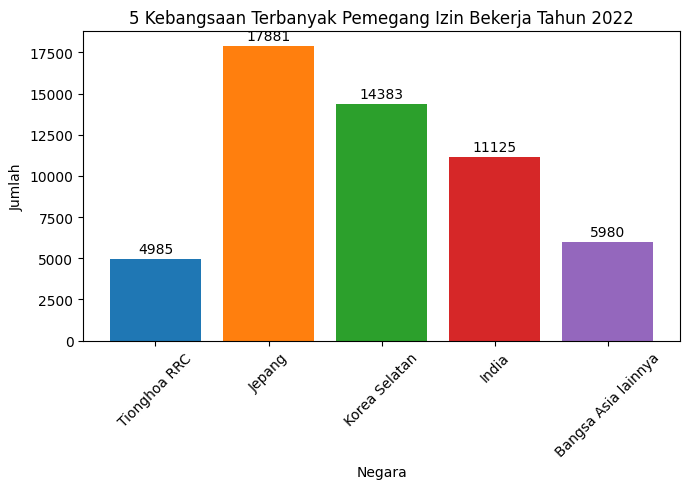

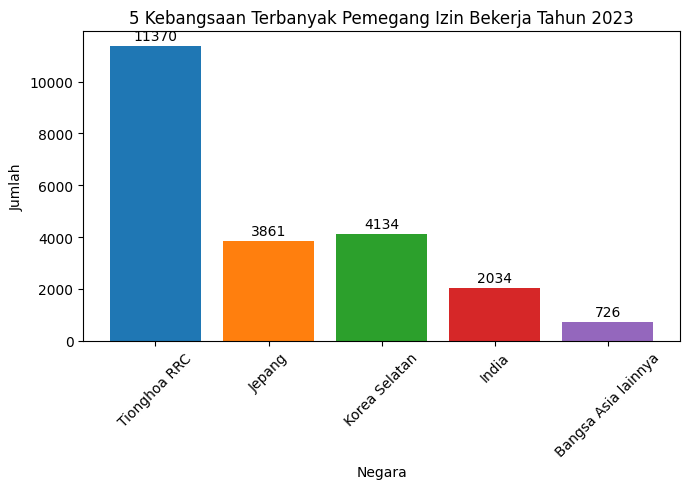

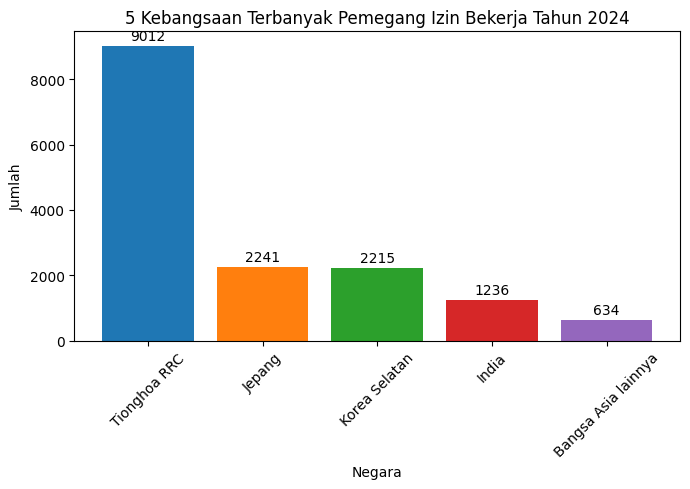

In [ ]:
# Hitung total per negara, kecualikan 'Lain-lain'
total_per_negara = df.drop(['Tahun', 'Jumlah'], axis=1).sum()
total_per_negara = total_per_negara[total_per_negara.index != 'Lain-lain']

# 5 Negara Terbanyak
top_countries = total_per_negara.sort_values(ascending=False).head(5).index

# Warna berbeda untuk tiap kebangsaan
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Tahun yang diinginkan
tahun_terpilih = [2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

for tahun in tahun_terpilih:
    data_tahun = df[df['Tahun'] == tahun][list(top_countries)].T
    data_tahun.columns = ['Jumlah']
    plt.figure(figsize=(7,5))
    bars = plt.bar(data_tahun.index, data_tahun['Jumlah'], color=colors)
    plt.title(f'5 Kebangsaan Terbanyak Pemegang Izin Bekerja Tahun {tahun}')
    plt.ylabel('Jumlah')
    plt.xlabel('Negara')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Tambahkan angka di atas setiap batang
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + max(data_tahun['Jumlah'])*0.01, int(yval), ha='center', va='bottom', fontsize=10)

    plt.show()

# Kategori Kebangsaan Berdasarkan Jumlah Pemegang Izin Bekerja (2014-2024)

                   Kebangsaan  Total_TKA Kategori
8                    Hongkong        400   Rendah
7   Australia / Selandia Baru       3840   Rendah
17                   Thailand       4347   Rendah
14                   Perancis       4504   Rendah
3                     Belanda       5209   Rendah
1          Tionghoa bukan RRT       5404   Rendah
16                  Singapura       5908   Sedang
11                     Jerman       6597   Sedang
5        Bangsa Eropa Lainnya       6702   Sedang
9                     Inggris       9119   Sedang
6              Amerika/Kanada      10069   Sedang
13                   Malaysia      12950   Sedang
15                  Philipina      14308   Tinggi
4         Bangsa Asia lainnya      15588   Tinggi
2                       India      29383   Tinggi
12              Korea Selatan      38713   Tinggi
10                     Jepang      45033   Tinggi
0                Tionghoa RRC      79162   Tinggi


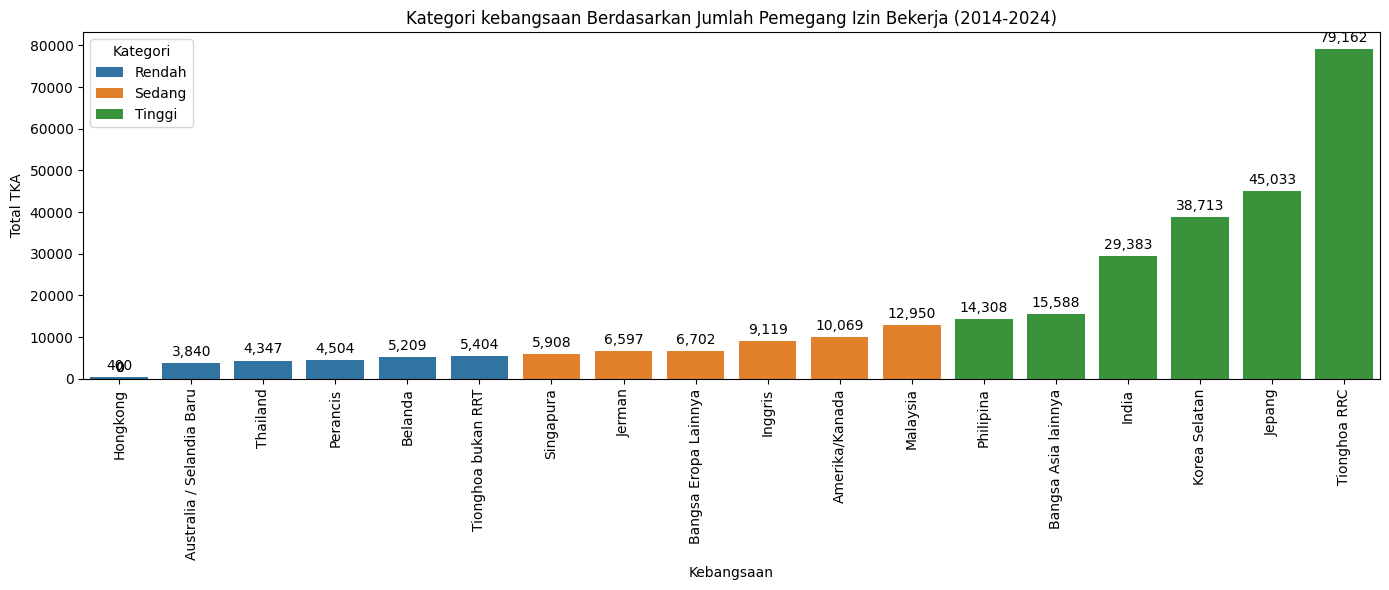

In [ ]:
# Hitung total TKA per kebangsaan
total_per_kebangsaan = df.drop(columns=['Tahun', 'Jumlah']).sum()

# Kecualikan "Lain-lain"
total_per_kebangsaan = total_per_kebangsaan[total_per_kebangsaan.index != 'Lain-lain']

# Kategorikan ke dalam 3 kelompok berdasarkan kuartil
kategori = pd.qcut(total_per_kebangsaan, q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Gabungkan ke DataFrame
kategori_df = pd.DataFrame({
    'Kebangsaan': total_per_kebangsaan.index,
    'Total_TKA': total_per_kebangsaan.values,
    'Kategori': kategori.values
}).sort_values('Total_TKA')

print(kategori_df)

# Visualisasi kategori
plt.figure(figsize=(14,6))
ax = sns.barplot(data=kategori_df, x='Kebangsaan', y='Total_TKA', hue='Kategori', dodge=False)
plt.title('Kategori kebangsaan Berdasarkan Jumlah Pemegang Izin Bekerja (2014-2024)')
plt.ylabel('Total TKA')
plt.xlabel('Kebangsaan')
plt.xticks(rotation=90)
plt.tight_layout()

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'bottom',
        fontsize=10, color='black',
        xytext = (0, 3),
        textcoords = 'offset points'
    )
plt.show()

# Tren TKA Tiap Kebangsaan di Jawa Tengah (2014-2024)

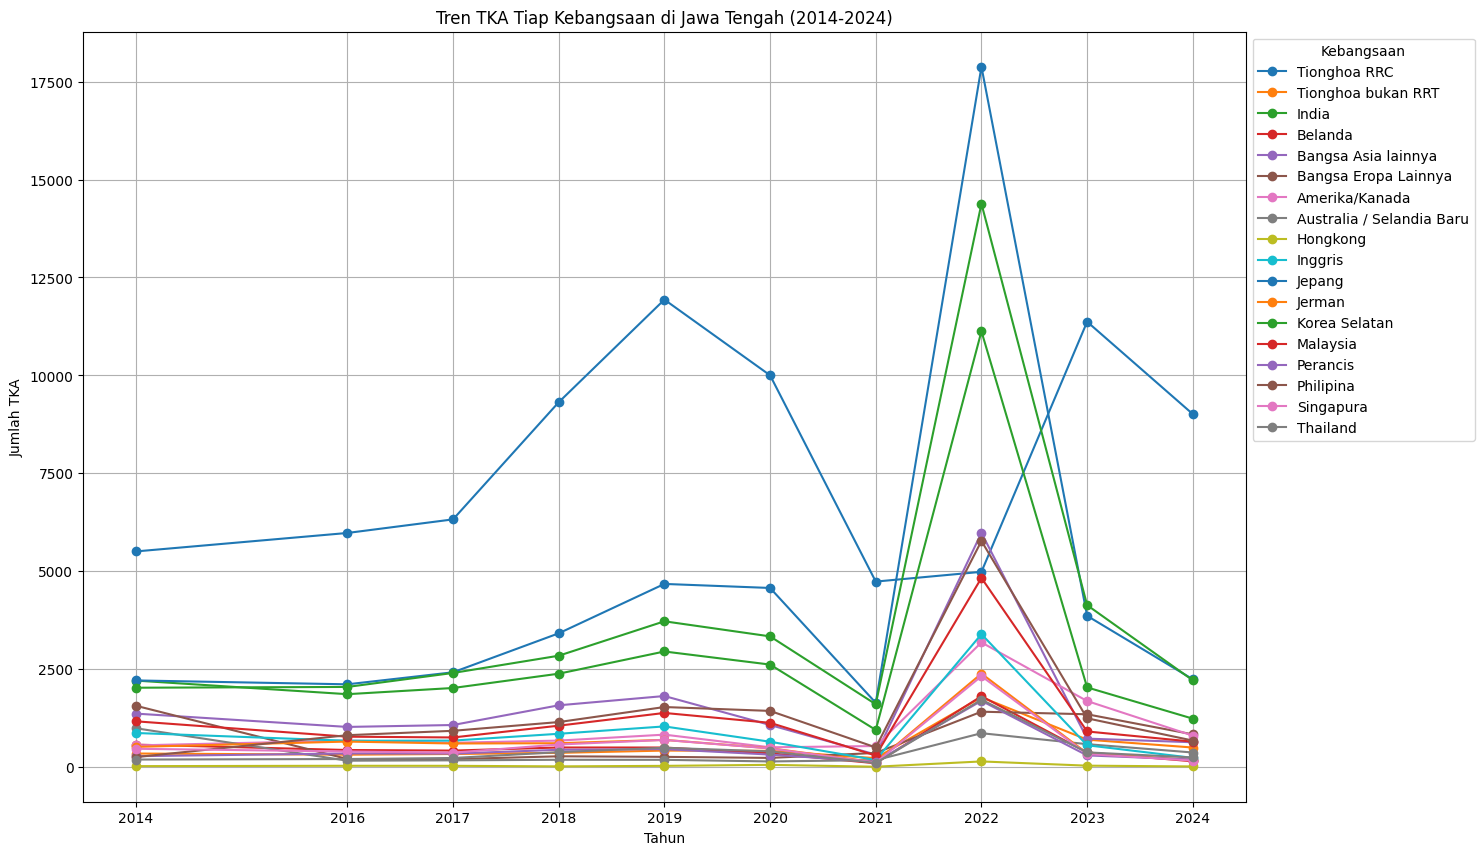

In [ ]:
# Perbandingan tren kebangsaan utama per tahun
kebangsaan = ['Tionghoa RRC', 'Tionghoa bukan RRT', 'India', 'Belanda', 'Bangsa Asia lainnya',
              'Bangsa Eropa Lainnya', 'Amerika/Kanada', 'Australia / Selandia Baru', 'Hongkong',
              'Inggris', 'Jepang', 'Jerman', 'Korea Selatan', 'Malaysia', 'Perancis', 'Philipina',
              'Singapura', 'Thailand']
plt.figure(figsize=(15,10))
for kebangsaan in kebangsaan:
    plt.plot(df['Tahun'], df[kebangsaan], marker='o', label=kebangsaan)
plt.title('Tren TKA Tiap Kebangsaan di Jawa Tengah (2014-2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah TKA')
plt.legend(title='Kebangsaan', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.xticks(df['Tahun'])
plt.show()

# Dynamic Time Warping

# Hasil Clustering Jarak DTW (Complete Linkage)

In [ ]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00


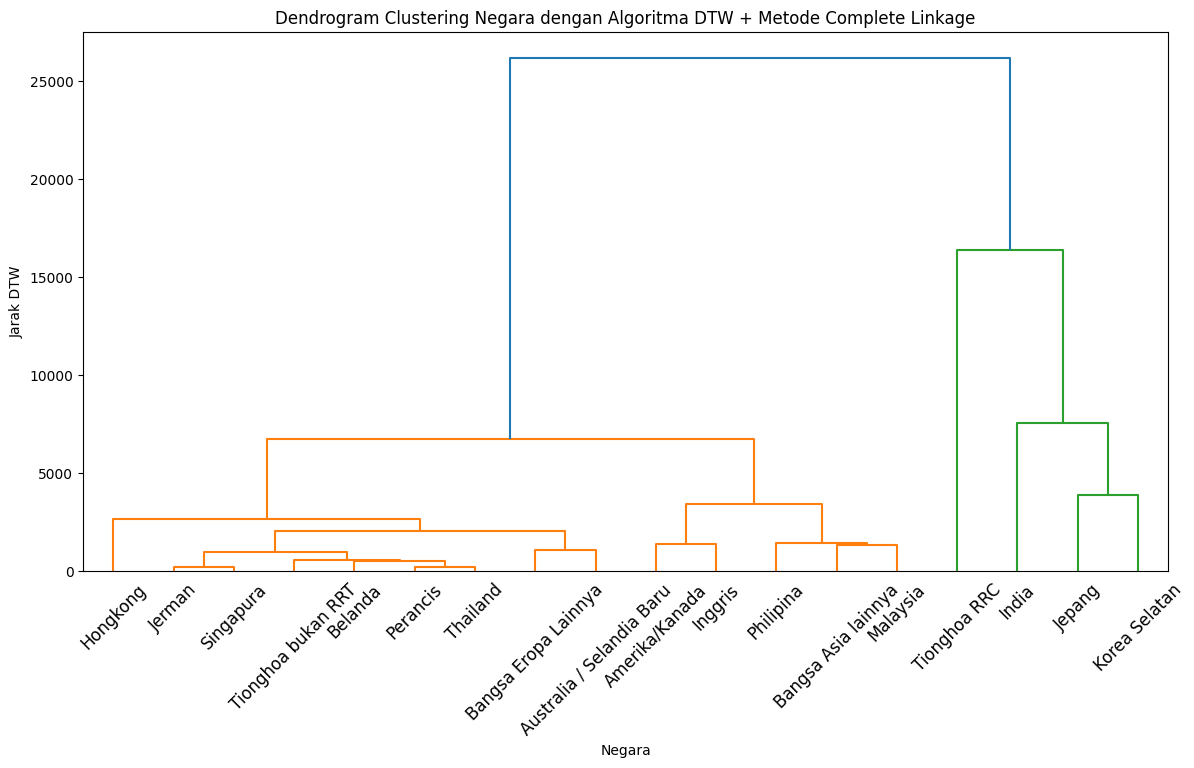

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from dtaidistance import dtw
from sklearn.metrics import silhouette_score

# Persiapan Data
negara_cols = [col for col in df.columns if col not in ['Tahun', 'Jumlah', 'Lain-lain']]
data = df[negara_cols].T.values  # Setiap baris = 1 negara, kolom = tahun

# Hitung Matriks Jarak DTW
n = data.shape[0]
dtw_dist = np.zeros((n, n))
for i in range(n):
    for j in range(i+1, n):
        dist = dtw.distance(data[i], data[j])
        dtw_dist[i, j] = dist
        dtw_dist[j, i] = dist

# Clustering Complete Linkage
linked = linkage(squareform(dtw_dist), method='complete')
plt.figure(figsize=(14, 7))
dendrogram(linked, labels=negara_cols)
plt.title('Dendrogram Clustering Negara dengan Algoritma DTW + Metode Complete Linkage')
plt.xlabel('Negara')
plt.ylabel('Jarak DTW')
x = plt.xticks(rotation=45)
plt.show()

# Validasi Cluster (Nilai Silhouette Coefficient)

Jumlah Cluster: 2, Silhouette Score: 0.717
Jumlah Cluster: 3, Silhouette Score: 0.719
Jumlah Cluster: 4, Silhouette Score: 0.586
Jumlah Cluster: 5, Silhouette Score: 0.433
Jumlah Cluster: 6, Silhouette Score: 0.402
Jumlah Cluster: 7, Silhouette Score: 0.298
Jumlah Cluster: 8, Silhouette Score: 0.269
Jumlah Cluster: 9, Silhouette Score: 0.310
Jumlah Cluster: 10, Silhouette Score: 0.241


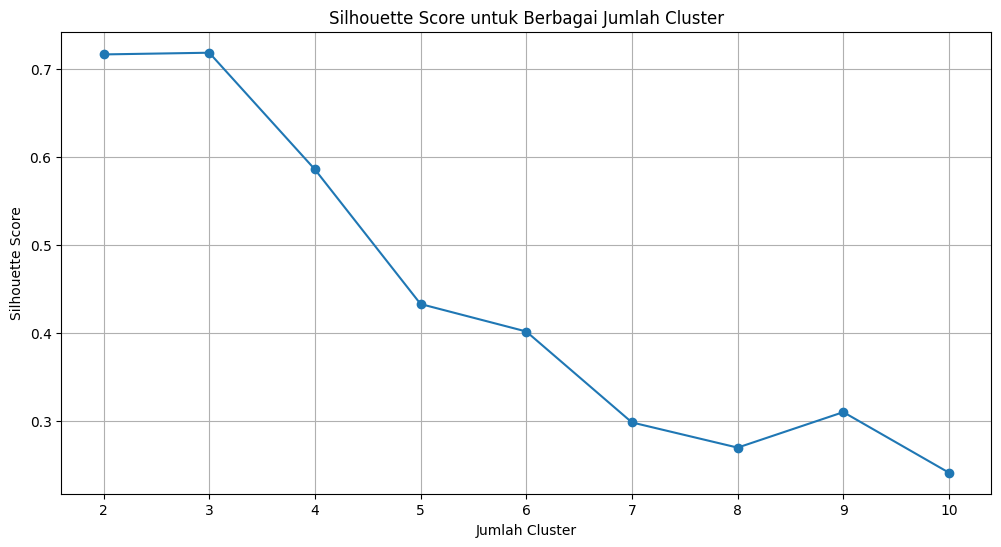

In [ ]:
# Silhouette Score untuk Berbagai Jumlah Cluster
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    clusters = fcluster(linked, n_clusters, criterion='maxclust')
    score = silhouette_score(dtw_dist, clusters, metric='precomputed')
    silhouette_scores.append(score)
    print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {score:.3f}')

# Visualisasi
plt.figure(figsize=(12,6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Jumlah Cluster Negara Optimal

In [ ]:
# Temukan jumlah cluster optimal
optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'Jumlah cluster optimal: {optimal_n_clusters}')

# Assign cluster pada jumlah optimal
optimal_clusters = fcluster(linked, optimal_n_clusters, criterion='maxclust')

# Tampilkan hasil pengelompokan
hasil_cluster = pd.DataFrame({
    'Negara': negara_cols,
    'Cluster': optimal_clusters
}).sort_values('Cluster')

print(hasil_cluster)

Jumlah cluster optimal: 3
                       Negara  Cluster
1          Tionghoa bukan RRT        1
3                     Belanda        1
5        Bangsa Eropa Lainnya        1
4         Bangsa Asia lainnya        1
6              Amerika/Kanada        1
7   Australia / Selandia Baru        1
9                     Inggris        1
8                    Hongkong        1
15                  Philipina        1
14                   Perancis        1
11                     Jerman        1
13                   Malaysia        1
17                   Thailand        1
16                  Singapura        1
10                     Jepang        2
2                       India        2
12              Korea Selatan        2
0                Tionghoa RRC        3


# Hasil Analisis Cluster Negara Paling Optimal

In [ ]:
# Assign cluster untuk 3 cluster
clusters_3 = fcluster(linked, 3, criterion='maxclust')

# Buat DataFrame hasil cluster
hasil_cluster_3 = pd.DataFrame({
    'Negara': negara_cols,
    'Cluster': clusters_3
})

# Tampilkan negara per cluster
for c in sorted(hasil_cluster_3['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(hasil_cluster_3[hasil_cluster_3['Cluster'] == c]['Negara'].values)


Cluster 1:
['Tionghoa bukan RRT' 'Belanda' 'Bangsa Asia lainnya'
 'Bangsa Eropa Lainnya' 'Amerika/Kanada' 'Australia / Selandia Baru'
 'Hongkong' 'Inggris' 'Jerman' 'Malaysia' 'Perancis' 'Philipina'
 'Singapura' 'Thailand']

Cluster 2:
['India' 'Jepang' 'Korea Selatan']

Cluster 3:
['Tionghoa RRC']
